Hola, Edgar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.

</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión</b> <a class="tocSkip"></a>

Hola Edgar, tu código está bien ordenado y tus resultados son correctos dados el dataset. Además entrenaras los modelos con un más de hiperparámetros y realias una conclusión al final del notebook de tus interpretaciones de los resultados y el modelo seleccionado. Sigue con el excelente trabajo!
</div>

In [1]:
# Importacion de librerias necesarias para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1. Limpieza y preparacion de datos para el análisis

In [2]:
visitas= pd.read_csv("/datasets/visits_log_us.csv")
pedidos= pd.read_csv("/datasets/orders_log_us.csv")
gastos=  pd.read_csv("/datasets/costs_us.csv")

In [3]:
visitas= visitas.iloc[:,[0,3,1,2,4]] # Ordene las columnas para una mejor interpretacion 
visitas.info()
visitas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   Start Ts   359400 non-null  object
 2   End Ts     359400 non-null  object
 3   Source Id  359400 non-null  int64 
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,Start Ts,End Ts,Source Id,Uid
0,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,16879256277535980062
1,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,104060357244891740
2,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,7459035603376831527
3,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,16174680259334210214
4,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:00,2017-07-29 19:07:19,2,18363291481961487539
359396,touch,2018-01-25 17:38:00,2018-01-25 17:38:19,1,18370831553019119586
359397,desktop,2018-03-03 10:12:00,2018-03-03 10:12:19,4,18387297585500748294
359398,desktop,2017-11-02 10:12:00,2017-11-02 10:12:19,5,18388616944624776485


In [4]:
pedidos.info()
pedidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [5]:
gastos.info()
gastos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


**Conclusion del paso 1**

Todo se ve en orden, lo unico que observo es que las fechas tienen tipo de dato object.
Por el momento lo dejare asi, si requiero hacer operaciones mas adelante con las fechas tendre que cambiar el tipo de dato de las fechas a datetime64[M]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy bien! La carga inicial de datos y el uso de herramientas como <code>info()</code>muestran que tienes un buen control del estado de tus tablas antes de analizar. Esta base sólida facilita que el resto del flujo sea confiable. Se nota orden y criterio en la exploración preliminar, ¡excelente!
</div>

# Paso 2. Informes y calculos de métricas 

## 1. Visitas:

**¿Cuántas personas lo usan cada día, semana y mes?**

Promedio de personas al dia: 10,241

Promedio de personas a la semana: 5,825

Promedio de personas al mes: 23,228


In [6]:
visitas['Start Ts']=pd.to_datetime(visitas['Start Ts'])

visitas['dia']=visitas['Start Ts'].dt.day
visitas['semana']=visitas['Start Ts'].dt.isocalendar().week
visitas['mes']=visitas['Start Ts'].dt.month


visitas_dia = (visitas.groupby(['dia']).agg({'Uid': 'nunique'}).mean())
visitas_semana = (visitas.groupby(['semana']).agg({'Uid': 'nunique'}).mean())
visitas_mes = (visitas.groupby(['mes']).agg({'Uid': 'nunique'}).mean())

print(int(visitas_dia))
print(int(visitas_semana))
print(int(visitas_mes))

10241
5825
23228


**¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).**

En promedio de sesiones por dia es de 11,593

In [7]:
sesiones_por_dia = (visitas.groupby(['dia']).agg({'Uid': 'count'}).mean())
print("Numero de sesiones por dia:",int(sesiones_por_dia))

Numero de sesiones por dia: 11593


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy bien! El cálculo de DAU/WAU/MAU con <code>groupby</code> está bien planteado y las visualizaciones permiten entender el pulso del producto. Se nota una lectura correcta de la estacionalidad y la tendencia general.
</div>

**¿Cuál es la duración de cada sesión?**

En promedio la duracion de una sesion es de 10 minutos con 43 segundos

In [8]:
visitas['End Ts']=pd.to_datetime(visitas['End Ts'])
visitas['duracion']=(visitas['End Ts']-visitas['Start Ts'])
print(visitas['duracion'].mean())

0 days 00:10:43.025687256


**¿Con qué frecuencia los usuarios regresan?**

Las personas regresan 1 vez por semana y 4 veces por mes en promedio

In [9]:
frecuencia_semana=visitas['dia']/visitas['semana']
print(frecuencia_semana.mean())

frecuancia_mes=visitas['dia']/visitas['mes']
print(frecuancia_mes.mean())

1.247777747529791
4.418264926372399


## 2. Ventas:

**¿Cuándo empieza la gente a comprar?**

Con los resultados podemos observar que la mayoria de la gente empieza a comprar el mismo dia en el que visita a la empresa Showz.

In [10]:
primera_visita=visitas.groupby(['Uid']).agg({'Start Ts': 'min'})
primera_compra=pedidos.groupby(['Uid']).agg({'Buy Ts': 'min'})

gente_que_compro= pd.merge(primera_visita,primera_compra,on='Uid',how='left')
gente_que_compro.dropna(inplace=True)
gente_que_compro=gente_que_compro.reset_index()
gente_que_compro['Buy Ts']=pd.to_datetime(gente_que_compro['Buy Ts'])
gente_que_compro['tiempo_compra']=gente_que_compro['Buy Ts']-gente_que_compro['Start Ts']
gente_que_compro['tiempo_compra']=gente_que_compro['tiempo_compra'].dt.days

gente_que_compro.describe()



,Uid,tiempo_compra
count,3.652300e+04,36523.000000
mean,9.213152e+18,16.729869
std,5.324792e+18,46.959088
min,3.135781e+14,0.000000
25%,4.615081e+18,0.000000
50%,9.245161e+18,0.000000
75%,1.383709e+19,2.000000
max,1.844617e+19,363.000000


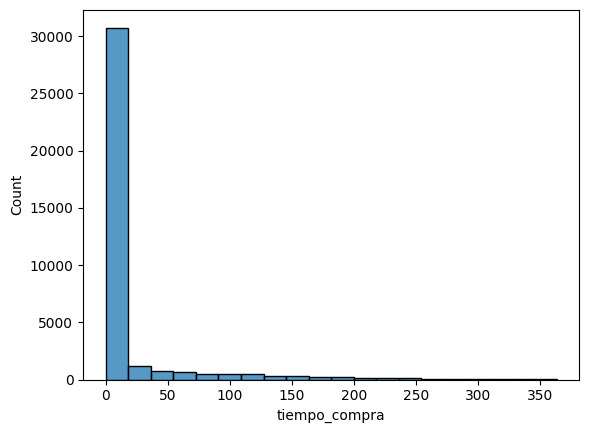

In [11]:
sns.histplot(data=gente_que_compro,x='tiempo_compra',bins=20)
plt.show()


**¿Cuántos pedidos hacen durante un período de tiempo dado?**

El mes en el que hacen mas pedidos es en diciembre y el mes donde menos actividad hay es en agosto 

In [12]:
pedidos['Buy Ts']=pd.to_datetime(pedidos['Buy Ts'])
pedidos['mes']=pedidos['Buy Ts'].dt.month

cantidad_pedidos=pedidos.groupby("mes")["Uid"].count()
print(cantidad_pedidos)

mes
1     4721
2     5281
3     5326
4     3273
5     4346
6     2355
7     2363
8     1807
9     3387
10    5679
11    5659
12    6218
Name: Uid, dtype: int64


**¿Cuál es el tamaño promedio de compra?**

Para esta pregunta note que muchos clientes no aportan mucho al momento de comprar, considere eliminar a las compras que tengan menos de 1.00 de ganancia, eliminando asi a 9,131 compras insignificantes.

Con el filtro de compras insignificantes el tamaño promedio de compra es de **8** y aun asi la desviacion estandar es demasiada por la diferencia de tamaños de compras entre el minimo y maximo.

In [13]:
pedidos.drop(pedidos[pedidos['Revenue']< 1].index,inplace=True)

In [14]:
tamaño_compra=pedidos.groupby("Uid")["Revenue"].sum()
print(tamaño_compra.describe())

count    30499.000000
mean         8.088505
std         96.342225
min          1.000000
25%          2.140000
50%          3.670000
75%          6.600000
max      11810.180000
Name: Revenue, dtype: float64


**¿Cuánto dinero traen? (LTV)**

En total se recaudo un monto de 246,691.31 

In [15]:
LVT=tamaño_compra.sum()
LVT

246691.31

## 3. Marketing:

**¿Cuánto dinero se gastó?**

En total se gasto 329,131.62, se puede observar en la grafica que a partir de agosto del 2017 empezo a subir el gasto exponencialmente, fue hasta diciembre del mismo año que empezo a bajar moderadamente.

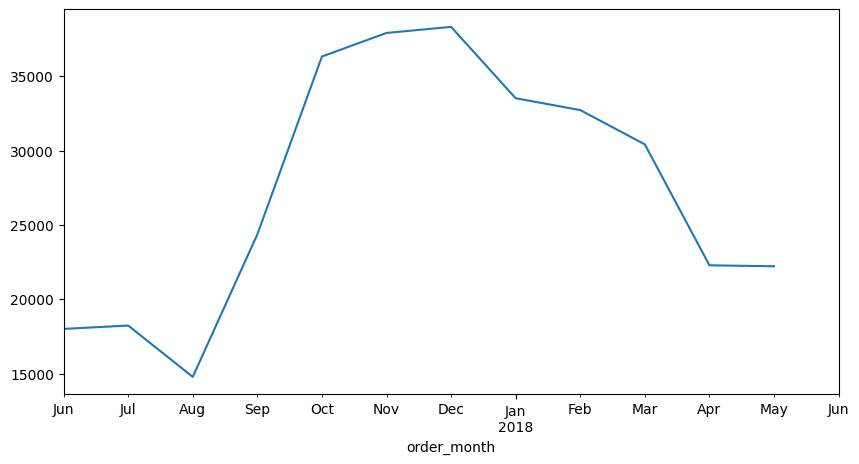

329131.62


In [16]:
gastos['order_month'] = gastos['dt'].astype('datetime64[ns]').dt.to_period('M')
gastos_por_mes=gastos.groupby("order_month")["costs"].sum()
gastos_por_mes.plot(kind='line',figsize=(10,5), xlim=(569,581))
plt.show()

total_gastos=gastos['costs'].sum()
print(total_gastos)

**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

Podemos observar a continuacion en donde mas se gasto fue en la fuente numero 3 y en donde menos se gasto fue en la fuente numero 9.

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


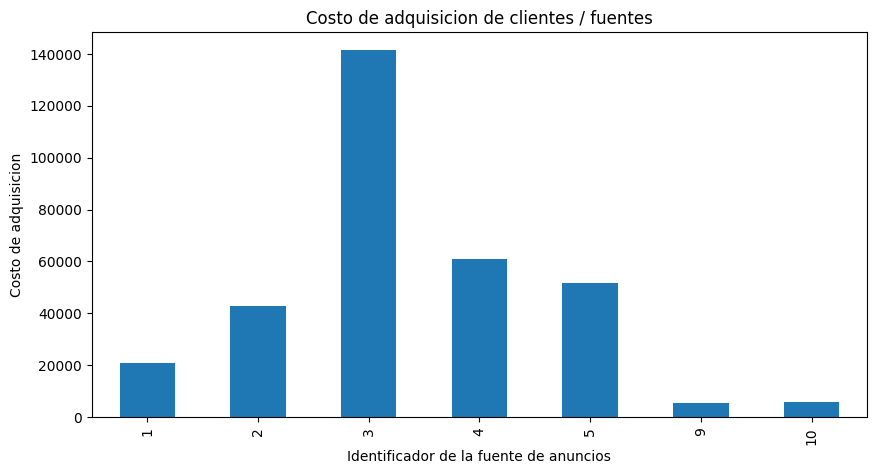

In [17]:
fuente_costo=gastos.groupby("source_id")["costs"].sum()
print(fuente_costo)

fuente_costo.plot(kind='bar',figsize=(10,5),title='Costo de adquisicion de clientes / fuentes',ylabel='Costo de adquisicion',xlabel='Identificador de la fuente de anuncios')
plt.show()

**¿Cuán rentables eran las inversiones?**

Como podemos ver a continuacion en todas las inversiones se obtuvo ganancia pero en la fuente numero 1 fue la mejor inversion.

In [18]:
pedidos=pd.merge(pedidos,visitas[['Uid','Source Id']],on='Uid',how='left')

lvt_source=pedidos.groupby("Source Id")["Revenue"].sum()
lvt_source.drop(index=7,inplace=True)
lvt_source.columns=['Revenue']

rentabilidad=lvt_source/fuente_costo

print(rentabilidad)

Source Id
1     109.546091
2      61.244075
3       2.066850
4       8.034975
5      22.630405
9       6.338065
10      2.415494
dtype: float64


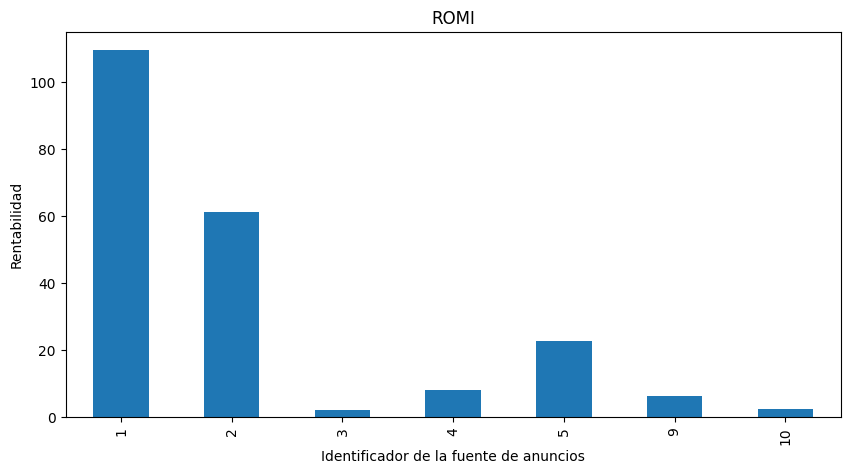

In [19]:
rentabilidad.plot(kind='bar',figsize=(10,5),title='ROMI',ylabel='Rentabilidad',xlabel='Identificador de la fuente de anuncios')
plt.show()

# Paso 3. Conclusión 

Segun los resultados que obtuve es mejor invertir en la fuente numero 1 ya que fue uno de los que menos se gasto y se obtuvo mas rentabilidad, vale la pena invertir(gastar) mas en esa fuente para que nos de mas dinero.

Por otro lado en donde **NO** se debe de invertir en en la fuente numero 3 ya que fue en el que se gasto mas y fue el que menos dio ganancia.

Tambien con la metrica que obtuve de los pedidos que se hacen por mes se puede concluir que conviene invertir mas en el mes de diciembre que en el mes de agosto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy buen trabajo! Tienes CAC por fuente/campaña, y el LTV operativo. Se nota coherencia entre costos, ingresos y usuarios; gran base para decisiones de inversión. Además lo complementas con el ROMI
</div>